# Analiza danych w języku Python - ćwiczenia laboratoryjne 2022/2023

Ten notatnik zalicza się do grupy zestawów zadań, na podstawie których odbywa się zaliczenie ćwiczeń i podlega zwrotowi do oceny w ustalonym na zajęciach terminie.

Uwagi i wytyczne ogólne dotyczące uzupełniania i oceny notatnika:
- Podczas wykonywania zadań należy korzystać wyłącznie z pakietów zaimportowanych na początku notatnika oraz z pakietów wchodzących w skład standardowej biblioteki Pythona, które można zaimportować samodzielnie we wskazanej komórce notatnika.
- Swoje rozwiązania należy wprowadzać wyłącznie w miejce następujących fragmentów kodu:<br/> `# YOUR CODE HERE`<br/> `raise NotImplementedError()`<br/> 
a odpowiedzi tekstowe w komórkach oznaczonych hasłem:<br/> 
`YOUR ANSWER HERE`<br/> 
Nie należy w żaden sposób modyfikować pozostałych fragmentów kodu oraz innych elementów notatnika, w szczególności dodawać lub usuwać komórek oraz zmieniać nazwy pliku.
- Jeżeli zestaw zadań wymaga skorzystania z fragmentów kodu opracowanego w ramach wcześniejszych zestawów zadań należy je umieścić we wskazanej komórce notatnika.
- Otrzymywane wyniki i odpowiedzi mają być rezultatem wykonania napisanego kodu, odpowiedzi uzupełniane manualnie nie podlegają ocenie.
- Zadanie należy wykonać w taki sposób, aby podczas wykonywania kodu nie zostały wyświetlone żadne ostrzeżenia.
- Zawarte w notatniku automatyczne testy mają charakter poglądowy. Dotyczą one wybranych aspektów zadań i mają za zadanie wyłapać podstawowe błędy. Przejście wszystkich testów nie oznacza, że zadanie jest wykonane w całości poprawnie i zostanie ocenione na maksymalną liczbę punktów.
- Zadania, które powodują wyświetlenie komunikatu o błędzie przerywającym wykonywanie kodu nie podlegają ocenie.

Uwagi i wytyczne ogólne dotyczące wizualizacji wyników:
- Wszystkie wykresy powinny być wykonane w jednolitym, przejrzystym i czytelnym stylu, posiadać odpowiednio dobrane proporcje i zakresy wartości osi.
- Wykresy oraz ich osie powinny mieć nadane tytuły. Jeżeli w obrębie figury znajduje się więcej niż jeden wykres to figura również powinna mieć nadany tytuł. 
- Figury powinny mieć ustawione białe tło, tak, aby niezależnie od ustawień notatnika wszystkie elementy wykresów były dobrze widoczne (domyślnie tło jest przeźroczyste co może powodować problemy w notatnikach z ustawionym ciemnym tłem).
- Rozmiar poziomy figur nie powinien przekraczać 20 cali.

Przed odesłaniem zestawu zadań do oceny proszę uzupełnić komórkę z danymi autorów rozwiązania (`NAME` - nazwa zespołu, `COLLABORATORS` - imiona, nazwiska i numery indeksów członków zespołu) oraz upewnić się, że notatnik działa zgodnie z oczekiwaniami. W tym celu należy skorzystać z opcji **Restart Kernel and Run All Cells...** dostępnej na górnej belce notatnika pod symbolem $\blacktriangleright\blacktriangleright$.

In [ ]:
NAME = ""
COLLABORATORS = ""

---

## Zestaw zadań 3: Elementy statystyki opisowej 3 (Notatnik 2/4)

In [89]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import dataframe_image as dfi

In [179]:
# Miejsce do importu pakietów wchodzących w skład standardowej biblioteki Pythona oraz ustawienie opcji wykorzystywanych 
import pickle
from matplotlib.gridspec import GridSpec


### Wczytanie danych
Wczytaj dane z przygotowanych wcześniej plików bike_traffic_data.pkl i  weather_data.pkl do tablic `bike_traffic_data` oraz `weather_data`.

Wyświetl przygotowane tablice.

In [91]:
# Ruch rowerowy
# YOUR CODE HERE
bike_traffic_data = pickle.load(open("bike_traffic_data.pkl", "rb"))
bike_traffic_data

,Total,East,West
Date,,,
2022-01-01 00:00,0.0,0.0,0.0
2022-01-01 01:00,0.0,0.0,0.0
2022-01-01 02:00,1.0,0.0,1.0
2022-01-01 03:00,0.0,0.0,0.0
2022-01-01 04:00,0.0,0.0,0.0
...,...,...,...
2022-12-31 19:00,14.0,6.0,8.0
2022-12-31 20:00,20.0,13.0,7.0
2022-12-31 21:00,16.0,6.0,10.0


In [92]:
# Pogoda
# YOUR CODE HERE
weather_data = pickle.load(open("weather_data.pkl", "rb"))
weather_data


Temperature                      Precipitation Snow        \
                   Min       Avg        Max         Total Fall Depth   
Date                                                                   
2022-01-01   -5.555556 -2.222222   1.111111         0.000  0.0  76.2   
2022-01-02   -1.111111  2.777778   6.111111        20.066  0.0  76.2   
2022-01-03    0.555556  2.777778   5.000000        12.446  0.0   0.0   
2022-01-04    1.666667  3.888889   5.555556         5.588  0.0   0.0   
2022-01-05    1.111111  2.777778   3.888889         8.382  0.0   0.0   
...                ...       ...        ...           ...  ...   ...   
2022-12-27    6.666667  9.444444  11.666667         6.858  0.0   0.0   
2022-12-28    5.000000  6.666667   7.777778         0.762  0.0   0.0   
2022-12-29    5.000000  6.666667   7.777778         8.890  0.0   0.0   
2022-12-30    5.555556  8.888889  11.666667         9.144  0.0   0.0   
2022-12-31    6.111111  7.777778   9.444444         0.254  0.0   0.0   

                Wind                    Sky  
           Avg speed  Max speed Cloud cover  
Date                                         
2022-01-01  3.576311   5.364467         0.8  
2022-01-02  3.799831   8.940778         1.0  
2022-01-03  5.140947  11.623011         0.9  
2022-01-04  4.336277   9.834856         0.9  
2022-01-05  2.235194   4.470389         1.0  
...              ...        ...         ...  
2022-12-27  7.733773  16.540439         1.0  
2022-12-28  5.766802  12.517089         0.8  
2022-12-29  2.771641   7.599661         1.0  
2022-12-30  6.437360  11.623011         0.9  
2022-12-31  4.470389   9.387817         0.9  

[365 rows x 9 columns]

### Zadnie 2: Przegląd danych - ruch rowerowy [15 pkt]

#### a) Tabele

Przygotuj trzy tablice prezentujące różne aspekty ruchu rowerowego według poniższych wytycznych.

Tablica `daily_bike_traffic_data` prezentuje sumaryczną liczbę rowerzystów przejeżdżających przez most w poszczególnych dniach roku w sumie oraz z podziałem na zachodnią i wschodnią stronę mostu.
> Indeks: Date</br>
> PeriodIndex zawierający okresy czasu, w których dokonywane były zliczenia rowerzystów.</br>

> Kolumny: Total, East, West</br>
> Kolumny zawierają liczbę rowerzystów przejeżdżających przez most w poszczególnych dniach roku w sumie oraz wraz z podziałem na zachodnią i wschodnią stronę mostu.
       
Tablica `bike_traffic_by_weekday_data` prezentuje średnią liczbę rowerzystów przejeżdżających przez most w poszczególnych dniach tygodnia w sumie oraz z podziałem na zachodnią i wschodnią stronę mostu.

> Indeks: Day</br>
> Dni tygodnia (Monday, Tuesday ... ).</br>

> Kolumny: Total, East, West</br>
> Kolumny zawierają średnią liczbę rowerzystów przejeżdżających przez most w poszczególnych dniach tygodnia w sumie oraz wraz z podziałem na zachodnią i wschodnią stronę mostu.
    
Tablica `weekday_weekend_hourly_bike_traffic_data`  prezentuje średnią liczbę rowerzystów przejeżdżających przez most w poszczególnych godzinach w sumie oraz z podziałem na zachodnią i wschodnią stronę mostu, a także z podziałem na dni robocze i weekend.

> Indeks: Hour </br>
> Godziny, dla których liczone są wartości średnie (0, 1, 2 ...).

> Kolumny: </br>
> 1 rzędu: Weekday, Weekend</br>
> 2 rzędu: Total, East, West (ten sam zestaw kolumn dla każdego okresu tygodnia)</br>
> Kolumny zawierają średnią liczbę rowerzystów przejeżdżających przez most w poszczególnych godzinach w sumie oraz wraz z podziałem na zachodnią i wschodnią stronę mostu.

Zapisz tablicę `daily_bike_traffic_data` do pliku daily_bike_traffic_data.pkl.

Wyświetl przygotowane tablice w taki sposób aby zawarte w nich liczby rowerzystów wyświetlały się z dokładnością 0 miejsc po przecinku, a średnie liczby rowerzystów z dokładnością 2 miejsc po przecinku. W przypadku tablicy `daily_bike_traffic_data` wyświetl tylko 10 pierwszych wierszy tablicy.

In [93]:
# Agregacja danych z poszczególnych dni roku
# YOUR CODE HERE

daily_bike_traffic_data = bike_traffic_data.resample('D').sum()
daily_bike_traffic_data

,Total,East,West
Date,,,
2022-01-01,33.0,23.0,10.0
2022-01-02,37.0,20.0,17.0
2022-01-03,253.0,93.0,160.0
2022-01-04,577.0,220.0,357.0
2022-01-05,713.0,261.0,452.0
...,...,...,...
2022-12-27,429.0,181.0,248.0
2022-12-28,1108.0,449.0,659.0
2022-12-29,687.0,261.0,426.0


In [94]:
# Agregacja danych z poszczególnych dni tygodni
# YOUR CODE HERE
# daily_bike_traffic_data.index.dayofweek
bike_traffic_by_weekday_data = daily_bike_traffic_data.groupby(daily_bike_traffic_data.index.dayofweek).mean()
bike_traffic_by_weekday_data['Day']= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

bike_traffic_by_weekday_data = bike_traffic_by_weekday_data.set_index('Day')
bike_traffic_by_weekday_data

,Total,East,West
Day,,,
Monday,2093.153846,820.807692,1272.346154
Tuesday,2579.961538,983.826923,1596.134615
Wednesday,2538.461538,971.576923,1566.884615
Thursday,2406.711538,926.596154,1480.115385
Friday,2087.442308,843.538462,1243.903846
Saturday,1929.962264,843.924528,1086.037736
Sunday,1664.442308,771.576923,892.865385


In [95]:
# Agregacja danych z konkretnych okresów tygodnia (dzień roboczy/weekend)
# YOUR CODE HERE

weekday = bike_traffic_data[bike_traffic_data.index.dayofweek <5]
weekend = bike_traffic_data[bike_traffic_data.index.dayofweek >4]
weekday_hours = weekday.groupby(weekday.index.hour).mean()
weekend_hours = weekend.groupby(weekend.index.hour).mean()
weekday_weekend_hourly_bike_traffic_data = pd.concat([weekday_hours,weekend_hours],axis=1)
weekday_weekend_hourly_bike_traffic_data.index.name = 'Hour'
iterables = ['Weekday', 'Weekend']
weekday_weekend_hourly_bike_traffic_data.columns = pd.MultiIndex.from_product([iterables, ['Total', 'East', 'West']])
weekday_weekend_hourly_bike_traffic_data


Weekday                            Weekend                      
           Total       East        West       Total       East       West
Hour                                                                     
0       6.565385   2.526923    4.038462   14.647619   6.190476   8.457143
1       3.069231   1.238462    1.830769    8.714286   3.295238   5.419048
2       1.992308   0.934615    1.057692    5.336538   2.298077   3.038462
3       1.750000   0.873077    0.876923    2.828571   1.295238   1.533333
4       6.892308   2.457692    4.434615    3.342857   1.076190   2.266667
5      19.973077   7.392308   12.580769    5.361905   1.990476   3.371429
6      70.692308  29.957692   40.734615   16.304762   6.209524  10.095238
7     167.507692  72.511538   94.996154   27.571429  11.276190  16.295238
8     236.534615  99.019231  137.515385   57.057143  24.933333  32.123810
9     148.876923  56.846154   92.030769   83.647619  37.285714  46.361905
10     88.153846  36.065385   52.088462  118.647619  50.771429  67.876190
11     82.619231  37.507692   45.111538  150.361905  67.257143  83.104762
12     89.042308  40.603846   48.438462  172.180952  80.838095  91.342857
13     93.603846  41.430769   52.173077  177.580952  84.533333  93.047619
14    107.407692  44.823077   62.584615  187.733333  87.790476  99.942857
15    149.134615  59.884615   89.250000  176.961905  85.285714  91.676190
16    228.996154  79.638462  149.357692  157.238095  73.323810  83.914286
17    324.423077  98.700000  225.723077  124.904762  57.161905  67.742857
18    220.134615  77.611538  142.523077   97.000000  43.685714  53.314286
19    121.003846  47.492308   73.511538   80.866667  30.923810  49.942857
20     74.530769  30.707692   43.823077   46.571429  20.876190  25.695238
21     48.646154  21.611538   27.034615   44.600000  14.428571  30.171429
22     30.215385  11.842308   18.373077   22.895238   8.961905  13.933333
23     19.380769   7.592308   11.788462   16.161905   6.428571   9.733333

In [96]:
### Komórka testowa

## Tabela 1
daily_bike_traffic_data
# Test 1 Kształt tablicy
assert daily_bike_traffic_data.shape == (365, 3)
# Test 2 Kolumny
assert len(set(list(daily_bike_traffic_data.columns)) & set(['Total', 'East', 'West'])) == 3
# Test 3 Indeks
assert (daily_bike_traffic_data.index.name == 'Date') == True
assert isinstance(daily_bike_traffic_data.index, pd.PeriodIndex)
assert daily_bike_traffic_data.index.values.min() == pd.Period('2022-01-01', 'D')
assert daily_bike_traffic_data.index.values.max() == pd.Period('2022-12-31', 'D')
# Test 4 Zawartość kolumn
assert np.all(np.isclose(daily_bike_traffic_data[['Total', 'East', 'West']].min().values, np.array([23., 12., 10.]))) == True
assert np.all(np.isclose(daily_bike_traffic_data[['Total', 'East', 'West']].max().values, np.array([4233., 1733., 3031.]))) == True

## Tabela 2
# Test 1 Kształt tablicy
assert bike_traffic_by_weekday_data.shape == (7, 3)
# Test 2 Kolumny
assert len(set(list(bike_traffic_by_weekday_data.columns)) & set(['Total', 'East', 'West'])) == 3
# Test 3 Indeks
assert (bike_traffic_by_weekday_data.index.name == 'Day') == True
assert len(set(list(bike_traffic_by_weekday_data.index)) & set(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])) == 7
# Test 4 Zawartość kolumn
assert np.all(np.isclose(bike_traffic_by_weekday_data.min().values, np.array([1664.44230769,  771.57692308,  892.86538462]))) == True
assert np.all(np.isclose(bike_traffic_by_weekday_data.max().values, np.array([2579.96153846,  983.82692308, 1596.13461538]))) == True

## Tabela 3
# Test 1 Kształt tablicy
assert weekday_weekend_hourly_bike_traffic_data.shape == (24, 6)
# Test 2 Kolumny
assert len(set(list(weekday_weekend_hourly_bike_traffic_data.columns)) & set(list(weekday_weekend_hourly_bike_traffic_data.columns))) == 6
# Test 3 Indeks
assert (weekday_weekend_hourly_bike_traffic_data.index.name == 'Hour') == True
assert weekday_weekend_hourly_bike_traffic_data.index.values.min() == 0
assert weekday_weekend_hourly_bike_traffic_data.index.values.max() == 23
# Test 4 Zawartość kolumn
assert np.all(np.isclose(weekday_weekend_hourly_bike_traffic_data.min().values, np.array([1.75, 0.87307692, 0.87692308, 2.82857143, 1.07619048, 1.53333333]))) == True
assert np.all(np.isclose(weekday_weekend_hourly_bike_traffic_data.max().values, np.array([324.42307692, 99.01923077, 225.72307692, 187.73333333, 87.79047619, 99.94285714]))) == True

#### b) Wykresy

Zwizualizuj dane z tablic `daily_bike_traffic_data`, `bike_traffic_by_weekday_data` oraz `weekday_weekend_hourly_bike_traffic_data` za pomocą wykresów liniowych. Przygotuj:
- wykres prezentujący liczbę rowerzystów przejeżdżających przez most w poszczególnych dniach roku w sumie oraz z podziałem na zachodnią i wschodnią stronę mostu,
- wykres prezentujący średnią liczbę rowerzystów przejeżdżających przez most w poszczególnych dniach tygodnia w sumie oraz z podziałem na zachodnią i wschodnią stronę mostu,
- wykres prezentujący średnią liczbę rowerzystów przejeżdżających przez most w poszczególnych godzinach w dni robocze w sumie oraz z podziałem na zachodnią i wschodnią stronę mostu,
- wykres prezentujący średnią liczbę rowerzystów przejeżdżających przez most w poszczególnych godzinach w weekendy w sumie oraz z podziałem na zachodnią i wschodnią stronę mostu.

Zestaw wykresy na pojedynczej figurze (siatka wykresów 2x3, przy czym wykres sum dziennych zajmuje wszystkie trzy pola w górnym wierszu figury). Przygotuj figurę zgodnie z wytycznymi z nagłówka notatnika. Dodatkowo:
- ustaw różne od domyślnych i od siebie nawzajem kolory wykresów poszczególnych parametrów (każdy z parametrów ma na wszystkich wykresach ten sam kolor),
- dodaj do figury pojedynczą legendę zawierającą nazwy zwizualizowanych parametrów i zlokalizowaną w dolnej części figury, pod wykresami,
- dopasuj zakresy osi wykresów do zakresu wartości danych.

(0.0, 350.0)

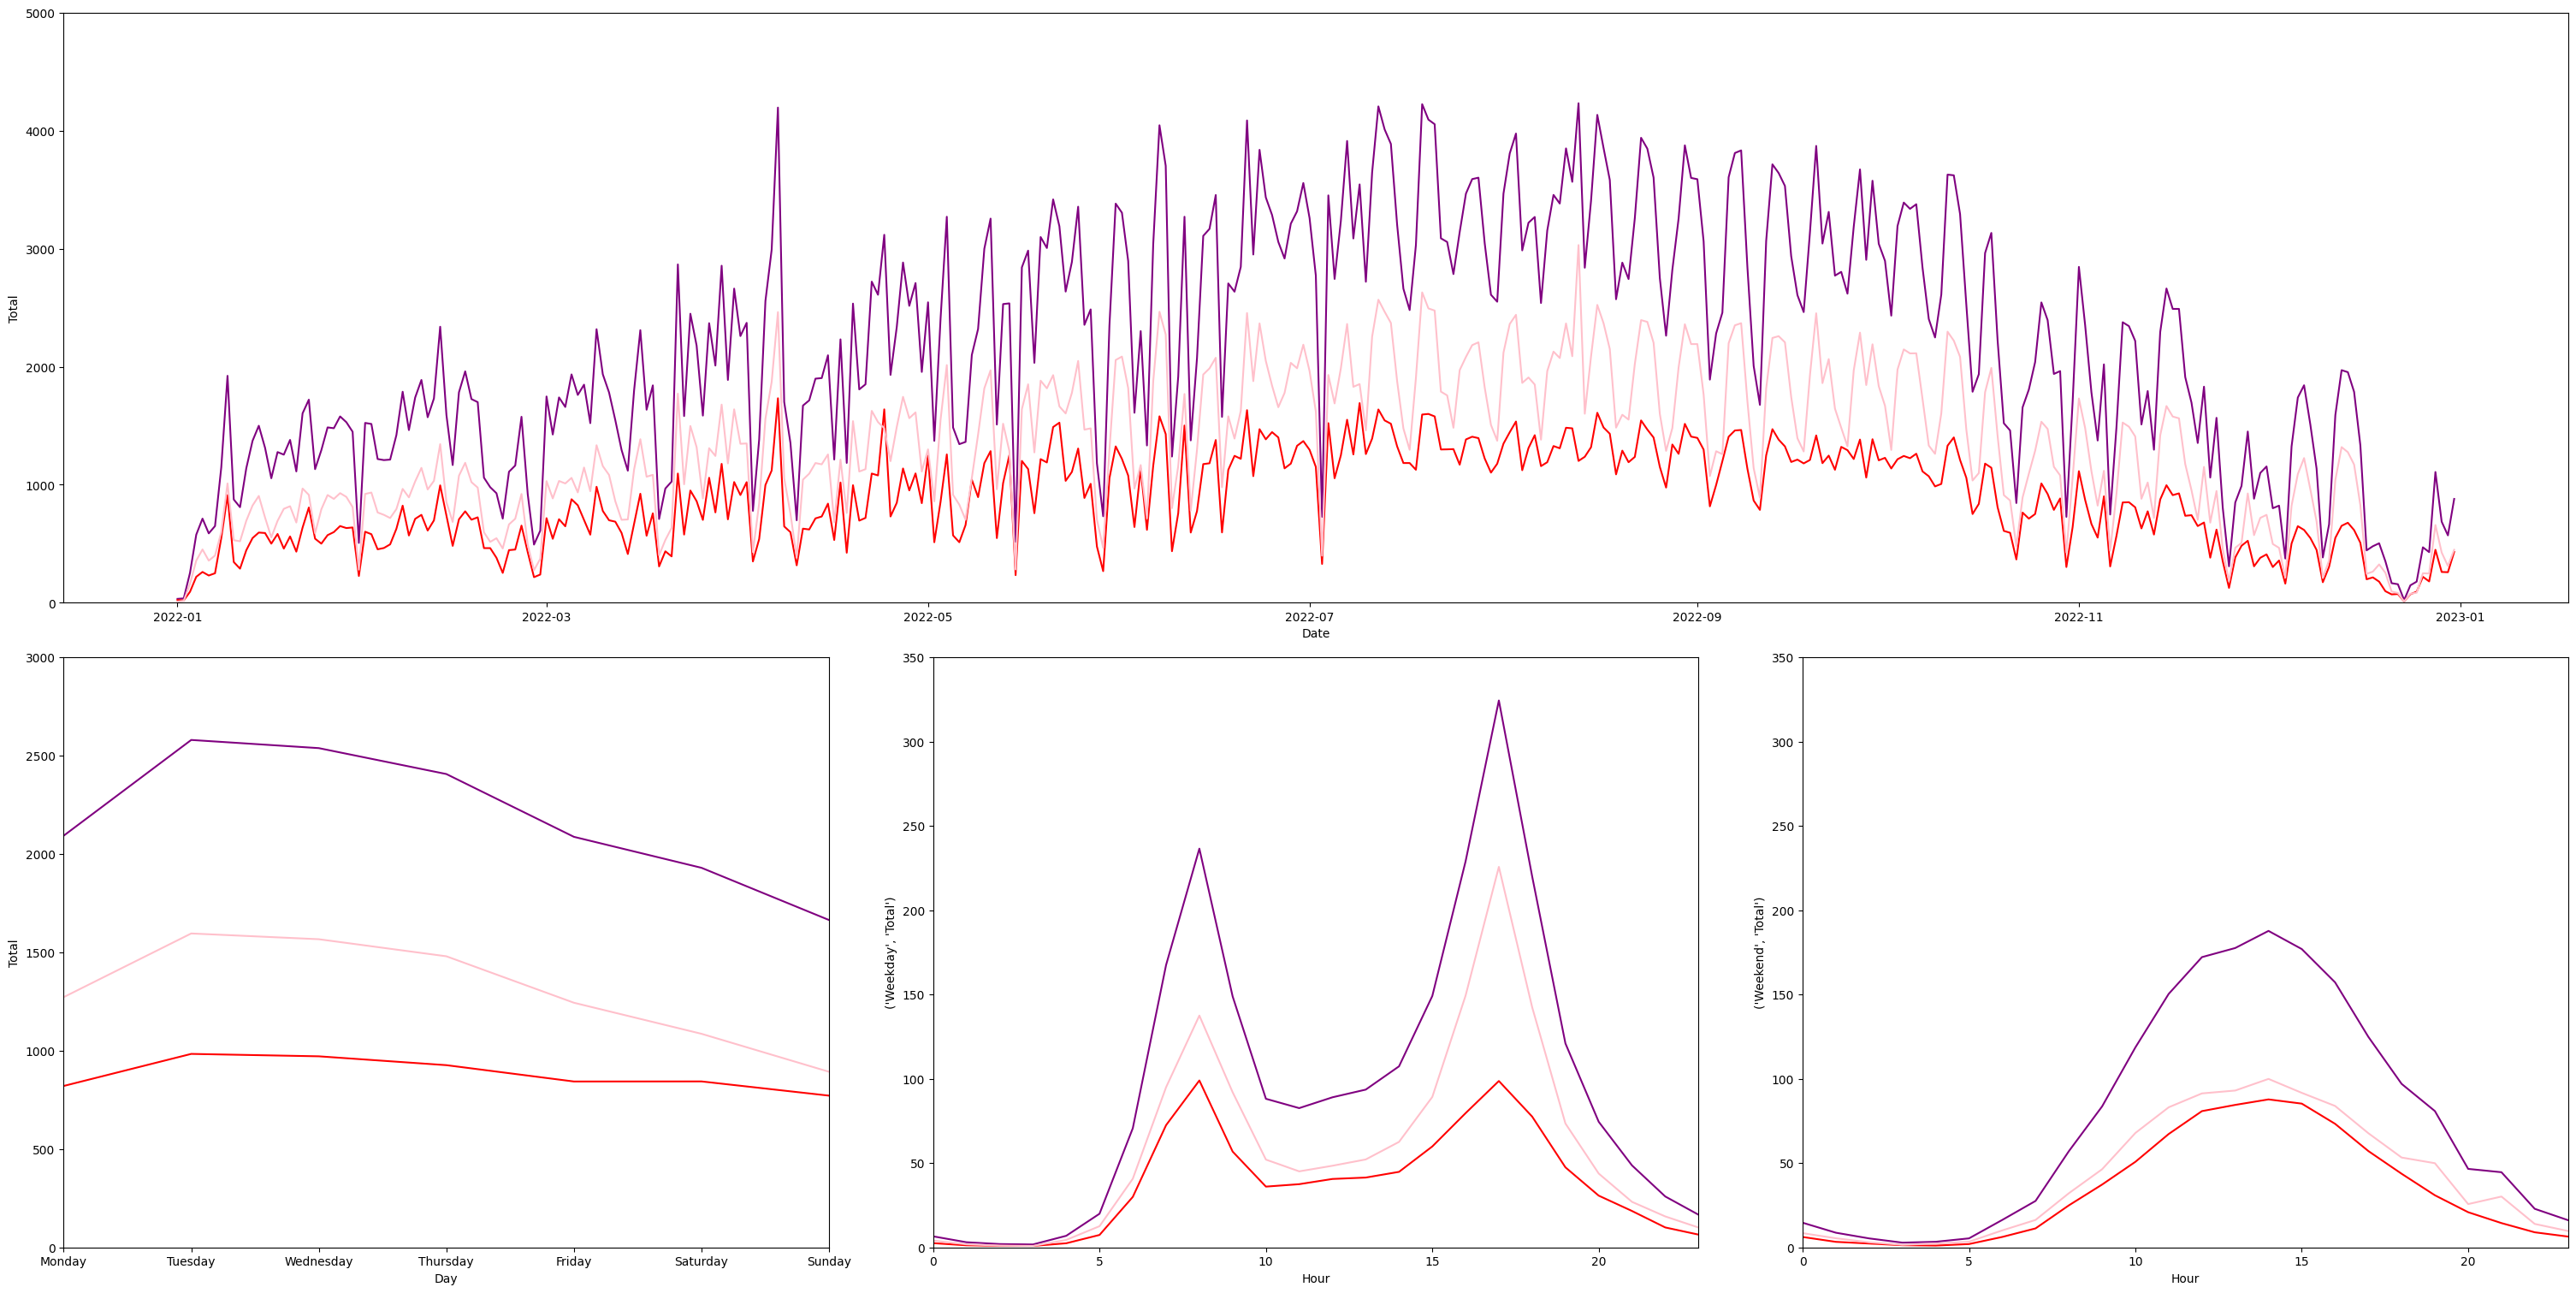

In [336]:
# YOUR CODE HERE
#fig, axes = plt.subplots(2,3,figsize=(30,15))

fig = plt.figure(layout="constrained", figsize=(30,15))

gs = GridSpec(2, 3, figure=fig)

ax0 = fig.add_subplot(gs[0, :])
ax1 = fig.add_subplot(gs[1,0])
ax2 = fig.add_subplot(gs[1,1])
ax3 = fig.add_subplot(gs[1,2])


# axes1 = axes[0, 0].twinx()
sns.lineplot(x=daily_bike_traffic_data.index.to_timestamp(), y=daily_bike_traffic_data['Total'], ax = ax0, color='purple')
sns.lineplot(x=daily_bike_traffic_data.index.to_timestamp(), y=daily_bike_traffic_data['East'], ax=ax0, color='red')
sns.lineplot(x=daily_bike_traffic_data.index.to_timestamp(), y=daily_bike_traffic_data['West'], ax=ax0, color='pink')


sns.lineplot(bike_traffic_by_weekday_data['Total'], ax = ax1, color = 'purple')
sns.lineplot(bike_traffic_by_weekday_data['East'], ax = ax1, color = 'red')
sns.lineplot(bike_traffic_by_weekday_data['West'], ax = ax1, color = 'pink')

#robocze
# axes2 = axes[1,1].twinx()
sns.lineplot(x=weekday_weekend_hourly_bike_traffic_data.index, y=weekday_weekend_hourly_bike_traffic_data['Weekday','Total'], ax=ax2, color='purple')
sns.lineplot(x=weekday_weekend_hourly_bike_traffic_data.index, y=weekday_weekend_hourly_bike_traffic_data['Weekday','East'], ax=ax2, color='red')
sns.lineplot(x=weekday_weekend_hourly_bike_traffic_data.index, y=weekday_weekend_hourly_bike_traffic_data['Weekday','West'], ax=ax2, color='pink')


#weekendy
# axes3 = axes[1,2].twinx()
sns.lineplot(x=weekday_weekend_hourly_bike_traffic_data.index, y=weekday_weekend_hourly_bike_traffic_data['Weekend','Total'], ax=ax3, color='purple')
sns.lineplot(x=weekday_weekend_hourly_bike_traffic_data.index, y=weekday_weekend_hourly_bike_traffic_data['Weekend','East'], ax=ax3, color='red')
sns.lineplot(x=weekday_weekend_hourly_bike_traffic_data.index, y=weekday_weekend_hourly_bike_traffic_data['Weekend','West'], ax=ax3, color='pink')


plt.setp(axes[1, 1].get_yticklabels(), visible=False)
plt.setp(axes[0, 0].get_yticklabels(), visible=False)

ax0.set_ylim(0,5000)

ax1.set_xlim(0,6)
ax1.set_ylim(0,3000)

ax2.set_xlim(0,23)
ax2.set_ylim(0,350)

ax3.set_xlim(0,23)
ax3.set_ylim(0,350)

In [104]:
daily_bike_traffic_data

,Total,East,West
Date,,,
2022-01-01,33.0,23.0,10.0
2022-01-02,37.0,20.0,17.0
2022-01-03,253.0,93.0,160.0
2022-01-04,577.0,220.0,357.0
2022-01-05,713.0,261.0,452.0
...,...,...,...
2022-12-27,429.0,181.0,248.0
2022-12-28,1108.0,449.0,659.0
2022-12-29,687.0,261.0,426.0


### Zadnie 3: Przegląd danych - pogoda [15 pkt]

#### a) Tabela

Przygotuj tablicę `monthly_weather_data` zawierającą dane z tablicy `weather_data` zagregowane w obrębie poszczególnych miesięcy według następującego klucza:
- wartość minimalna z całego miesiąca: Temperature: Min,
- wartość maksymalna z całego miesiąca: Temperature: Max, Wind: Max speed,
- suma z całego miesiąca: Precipitation: Total, Snow: Fall,
- średnia z całego miesiąca: Temperature: Avg, Snow: Depth, Wind: Avg speed, Sky: Cloud cover.

Tablica powinna zawierać wyłącznie następujące elementy:</br>
> Indeks: Date</br>
> PeriodIndex zawierający okresy czasu, których dotyczą dane z raportów pogodowych.</br>

> Kolumny: W podanej niżej kolejności</br>
> Temperature: Min, Avg, Max</br>
> Precipitation: Total</br>
> Snow: Fall, Depth</br>
> Wind: Avg speed, Max speed</br>
> Sky: Cloud cover</br>
> (Nazwa 1 poziomu: podległe jej nazwy 2 poziomu)

Wyświetl przygotowaną tablicę w taki sposób aby zawarte w nich wartości wyświetlały się z dokładnością 2 miejsc po przecinku.

In [475]:
# YOUR CODE HERE
weather_data = weather_data.fillna(0) #DOPYTAC!!

min_temp = weather_data['Temperature','Min'].resample('M').min()
max_temp = weather_data['Temperature','Max'].resample('M').max()
max_wind = weather_data['Wind','Max speed'].resample('M').max()
prec_total = weather_data['Precipitation','Total'].resample('M').sum()
snow_fall = weather_data['Snow','Fall'].resample('M').sum()
temp_avg = weather_data['Temperature','Avg'].resample('M').mean()
snow_depth = weather_data['Snow','Depth'].resample('M').mean()
wind_avg = weather_data['Wind','Avg speed'].resample('M').mean()
sky_cloud = weather_data['Sky','Cloud cover'].resample('M').mean()

# col = [min_temp.name, max_temp.name, max_wind.name, prec_total.name, snow_fall.name, temp_avg.name, snow_depth.name, wind_avg.name, sky_cloud.name]
# monthly_weather_data.columns = pd.MultiIndex.from_tuples(col)
# index = min_temp.index


monthly_weather_data = pd.concat([min_temp,temp_avg,max_temp,prec_total,snow_fall,snow_depth,wind_avg,max_wind,sky_cloud],axis=1)
monthly_weather_data

Temperature                       Precipitation    Snow            \
                Min        Avg        Max         Total    Fall     Depth   
Date                                                                        
2022-01   -5.555556   5.125448  13.333333       179.324    0.00  4.916129   
2022-02   -5.000000   5.773810  13.888889       135.128    0.00  0.000000   
2022-03   -1.666667   8.440860  17.222222        84.328    0.00  0.000000   
2022-04    0.000000   8.518519  22.777778        68.834    0.00  0.000000   
2022-05    4.444444  11.612903  21.666667        97.028    0.00  0.000000   
2022-06    8.888889  16.314815  32.777778        67.818    0.00  0.000000   
2022-07    0.000000  19.462366  35.000000         4.572    0.00  0.000000   
2022-08   11.666667  21.272401  32.777778         1.270    0.00  0.000000   
2022-09    9.444444  18.370370  33.333333         6.350    0.00  0.000000   
2022-10    5.000000  14.390681  31.111111        63.754    0.00  0.000000   
2022-11   -1.666667   5.462963  13.888889       122.682   27.94  0.000000   
2022-12   -7.777778   3.906810  13.888889       191.770  119.38  4.916129   

             Wind                    Sky  
        Avg speed  Max speed Cloud cover  
Date                                      
2022-01  3.078800  13.411167    0.832258  
2022-02  3.467745  11.623011    0.789286  
2022-03  2.956225  11.175972    0.803226  
2022-04  3.978646  13.411167    0.750000  
2022-05  3.485461  12.964128    0.796774  
2022-06  3.340871  10.728933    0.730000  
2022-07  2.974972   9.387817    0.438710  
2022-08  3.215796   8.046700    0.448387  
2022-09  3.309578  11.175972    0.480000  
2022-10  2.936036  10.728933    0.525806  
2022-11  3.623995  14.305244    0.656667  
2022-12  3.915195  16.540439    0.867742

In [438]:
### Komórka testowa
# Test 1 Kształt tablicy
assert monthly_weather_data.shape == (12, 9)
# Test 2 Kolumny
assert len(set(list(monthly_weather_data.columns)) & set([('Temperature', 'Min'), ('Temperature', 'Avg'), ('Temperature', 'Max'), ('Precipitation', 'Total'),
            ('Snow', 'Fall'), ('Snow', 'Depth'), ('Wind', 'Avg speed'), ('Wind', 'Max speed'), ('Sky', 'Cloud cover')])) == 9
# Test 3 Indeks
assert (monthly_weather_data.index.name == 'Date') == True
assert isinstance(monthly_weather_data.index, pd.PeriodIndex) == True
assert monthly_weather_data.index.values.min() == pd.Period('2022-01', 'M')
assert monthly_weather_data.index.values.max() == pd.Period('2022-12', 'M')
# Test 4 Zawartość kolumn
assert np.all(np.isclose(monthly_weather_data.min().values, np.array([-7.77777778, 3.90681004, 13.33333333, 1.27, 0., 0., 2.93603606, 8.0467, 0.43870968]))) == True
assert np.all(np.isclose(monthly_weather_data.max().values, np.array([11.66666667, 21.27240143, 35., 191.77, 119.38, 4.91612903, 3.97864611, 16.54043889, 0.86774194]))) == True

#### b) Wykresy

Zwizualizuj dane z tablicy `weather_data` za pomocą następującego zestawu wykresów:
- temperatura dzienna (minimalna, średnia i maksymalna), wypełnij kolorem przestrzeń między temperaturą minimalną i maksymalną,
- dzienne zachmurzenie (lewa oś wykresu) i opady (prawa oś wykresu), wypełnij kolorem przestrzeń pod każdym z wykresów,
- dzienna średnia i maksymalna prędkość wiatru.

Zestaw wykresy na pojedynczej figurze (siatka wykresów 3x1). Przygotuj figurę zgodnie z wytycznymi z nagłówka notatnika. Dodatkowo:
- ustaw różne od domyślnych i od siebie nawzajem kolory wykresów poszczególnych parametrów,
- dodaj do figury pojedynczą legendę zawierającą nazwy wizualizowanych parametrów i zlokalizowaną w dolnej części figury, pod wykresami, uwzględnij w legendzie nie tylko kolory linii, ale również zastosowanych wypełnień,
- dopasuj zakresy osi wykresów do zakresu danych, w szczególności dobierz skale osi Y tak, aby wykresy opadów i zachmurzenia nie przysłaniały się wzajemnie,
- w opisach osi Y umieść jednostki, w których wyrażone są wartości widoczne na wykresach.

(0.0, 20.0)

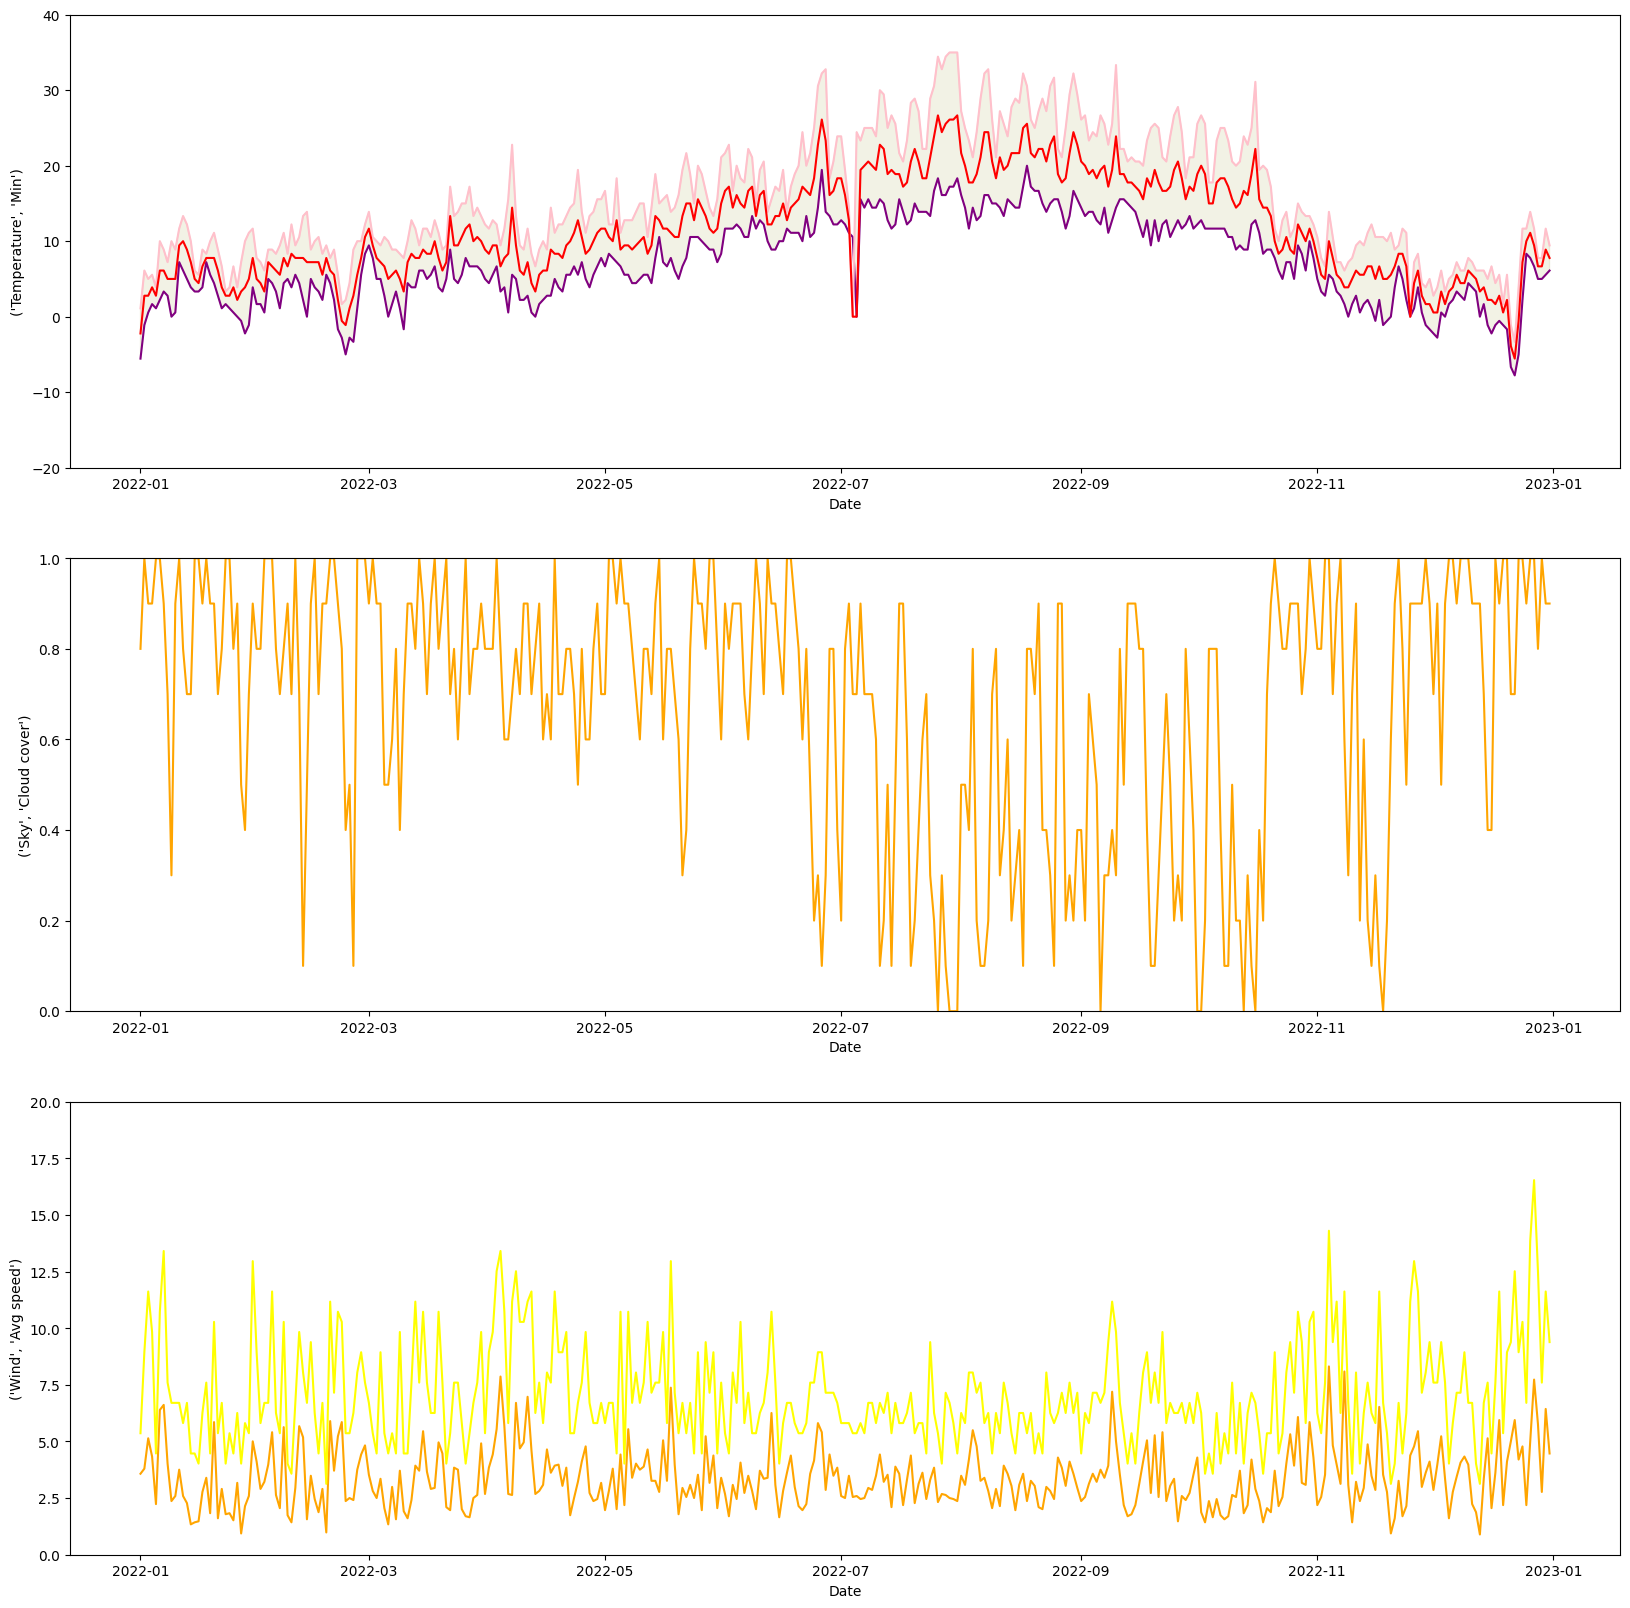

In [497]:
# YOUR CODE HERE
fig, axes = plt.subplots(3,1,figsize=(20,20))

x = weather_data.index.to_timestamp()
y1 = weather_data['Temperature','Min']
y2 = weather_data['Temperature','Max']

sns.lineplot(x=x, y=weather_data['Temperature','Min'], ax=axes[0], color='purple')
sns.lineplot(x=x, y=weather_data['Temperature','Max'], ax=axes[0], color='pink')
sns.lineplot(x=x, y=weather_data['Temperature','Avg'], ax=axes[0], color='red')


axes[0].fill_between(x, y1, y2, where=y1 < y2, interpolate=True, alpha=0.1, color='olive')
axes[0].set_ylim(-20,40)

sns.lineplot(x=x, y=weather_data['Sky','Cloud cover'], ax=axes[1], color='orange')
#sns.lineplot(x=x, y=weather_data['Snow','Fall'], ax=axes[1], color='blue')
axes[1].set_ylim(0,1)

sns.lineplot(x=x, y=weather_data['Wind','Avg speed'], ax=axes[2], color='orange')
sns.lineplot(x=x, y=weather_data['Wind','Max speed'], ax=axes[2], color='yellow')
axes[2].set_ylim(0,20)

